<a href="https://colab.research.google.com/github/ECHOIgOng/229352_660510593/blob/main/660510593_Lab09_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #9

In [95]:
%%capture
!git clone https://github.com/donlapark/ds352-labs.git

In [96]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

## Training a neural network in PyTorch

### Chihuahua or Muffin?

<center><img src="https://donlapark.pages.dev/229352/lab09-preview.jpg" width="500"/></center>

### 1. Data preparation

#### Load images, resize them to 128x128, and normalize the pixels to be in 0 - 1 range

In [97]:
transform = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.ToTensor()])  # transform pixels to be in 0 - 1 range

dataset = datasets.ImageFolder(root="ds352-labs/lab09-data/train",
                                         transform=transform)

#### Split the dataset into training (80%), validation (20%)

In [98]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#### Load the datasets into DataLoader

In [99]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=10,
                          shuffle=True)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=len(val_dataset),
                        shuffle=False)

#### Do the same for the test images

In [100]:
test_dataset = datasets.ImageFolder(root="ds352-labs/lab09-data/test",
                                    transform=transform)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=len(test_dataset),
                         shuffle=False)

#### Looking at the first minibatch

In [101]:
train_batches = iter(train_loader)
X, y = next(train_batches)

print(X.shape)  # (batch_size, channel, height, weight)
print(y.shape)

torch.Size([10, 3, 128, 128])
torch.Size([10])


#### Visualize the first four images in the batch

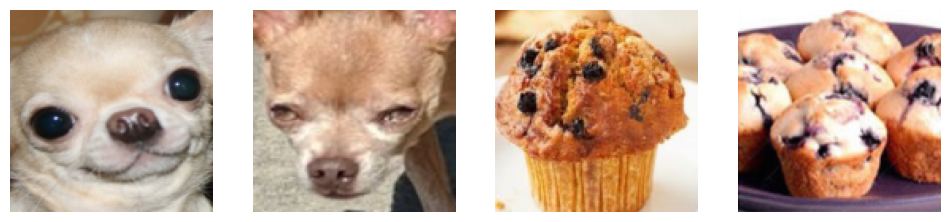

tensor([0, 0, 1, 1])


In [102]:
X = X[:4]  # Select the first 4 images
X = X.numpy().transpose(0, 2, 3, 1)  # Convert from (B, C, H, W) to (B, H, W, C)

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(X[i])
    axes[i].axis('off')
plt.show()

print(y[:4])

### 2. Build a simple logistic regression

<center><img src="https://donlapark.pages.dev/229352/logistic.png" width="300"/></center>

The most important component of the model class is the `__init__` method and the `forward` method.  
  
[Activation functions in PyTorch](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). The most important ones are [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html), [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html), [Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html), [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html).

In [103]:
class SimpleLogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.lin1 = nn.Linear(3*128*128, 1)
    self.act1 = nn.ReLU()
    self.lin2 = nn.Linear(100, 50)
    self.act2 = nn.ReLU()
    self.lin3 = nn.Linear(50, 1)
    self.act3 = nn.ReLU()

  def forward(self, x):
    x = self.flatten(x)
    x = self.lin1(x)
    x = self.act1(x)
    x = self.lin2(x)
    x = self.act2(x)
    x = self.lin3(x)
    x = self.act3(x)
    return x

### 3. Initialize training components

#### Initialize the model and loss function

[Loss functions in PyTorch](https://pytorch.org/docs/stable/nn.html#loss-functions). Most important ones are [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html), [Binary cross, entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), [Categorical cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

In [104]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

#### Manually setting initial weights to zero for demonstration

In [105]:
with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

#### Create two lists to collect training and validation losses

In [106]:
# List to store the loss values for plotting
train_losses = []
val_losses = []

#### Specify the learning rate

In [107]:
learning_rate = 1e-3
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

### 4. Training the model with gradient descent

#### Convert the dataloader into minibatches

In [108]:
x, y = next(iter(train_batches))

#### Make a prediction on the minibatch (Forward pass)

In [109]:



#y_hat = y_hat[:, 0]
#y = y.to(torch.float32)

#### Calculate the loss function

Recall that `criterion()` is our binary cross-entropy loss (`BCELoss`).

In [110]:
# Compute the loss
train_loss = criterion(y_hat, y)
train_losses.append(train_loss.item())

ValueError: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([30])) is deprecated. Please ensure they have the same size.

#### Calculate the gradient (Backward pass)

In [ ]:
# Backward pass: compute the gradient of the loss w.r.t. model parameters
train_losses.backward()

In [ ]:
model.parameters()

#### Perform a gradient descent step

Careful! We must not include this step in the gradient calculation, hence the use of `with torch.no_grad()`.

In [ ]:
# Manually update the weights using the gradient descent rule
optimizer.step()

# Zero the gradients after updating
model.zero_grad()

#### Do the same for the validation set

Careful! Anything in the validation step must not be included in the gradient calculation, hence the use of `with torch.no_grad()`.

In [ ]:
with torch.no_grad():
  for X, y in val_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)
    val_loss = criterion(y_hat, y)
    val_losses.append(val_loss.item())

In [ ]:
print(train_losses)
print(val_losses)

#### Combine everything together.

Repeat the previous steps for 20 **epochs** and plot the training and validation losses.

In [ ]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()
opimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-4

for epoch in range(10):
  for X, y in train_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exercise

In this exercise, we will add more layers to our classification model.

<img src="https://donlapark.pages.dev/229352/lab09-architecture.png" width="450"/>

1. Create a neural network with 3 hidden layers as shown in the picture.

2. Train the model with learning rate = 1e-2, 1e-3, 1e-4, 1e-5, and answer the following questions.
    2.1 What value of learning rate do you **think** is the best? Please explain your reason.
    2.2 What happens to the training losses if your learning rate is too large?
    2.3 What happens to the training losses if your learning rate is too small?

3. After finish training your model. Make the predictions on the test set and compute the accuracy. You may use the provided code below.

4. Use `plt.imshow()` to display at least four images that are incorrectly classified by this model.

In [124]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3*128*128, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.out(x))
        return x


lr=0.01 | Epoch 1: train=0.6891, val=0.6839
lr=0.01 | Epoch 2: train=0.6827, val=0.6686
lr=0.01 | Epoch 3: train=0.6723, val=0.6588
lr=0.01 | Epoch 4: train=0.6539, val=0.6391
lr=0.01 | Epoch 5: train=0.6010, val=0.7084
lr=0.01 | Epoch 6: train=0.6137, val=0.5910
lr=0.01 | Epoch 7: train=0.6089, val=0.6532
lr=0.01 | Epoch 8: train=0.5450, val=0.5597
lr=0.01 | Epoch 9: train=0.6387, val=0.5184
lr=0.01 | Epoch 10: train=0.5939, val=0.5007
lr=0.01 | Epoch 11: train=0.5427, val=0.5331
lr=0.01 | Epoch 12: train=0.4847, val=0.6074
lr=0.01 | Epoch 13: train=0.4117, val=0.4169
lr=0.01 | Epoch 14: train=0.4336, val=0.6551
lr=0.01 | Epoch 15: train=0.4078, val=0.4517
lr=0.01 | Epoch 16: train=0.4204, val=0.7025
lr=0.01 | Epoch 17: train=0.3237, val=0.3532
lr=0.01 | Epoch 18: train=0.2732, val=0.3691
lr=0.01 | Epoch 19: train=0.5723, val=0.3318
lr=0.01 | Epoch 20: train=0.2532, val=0.4437


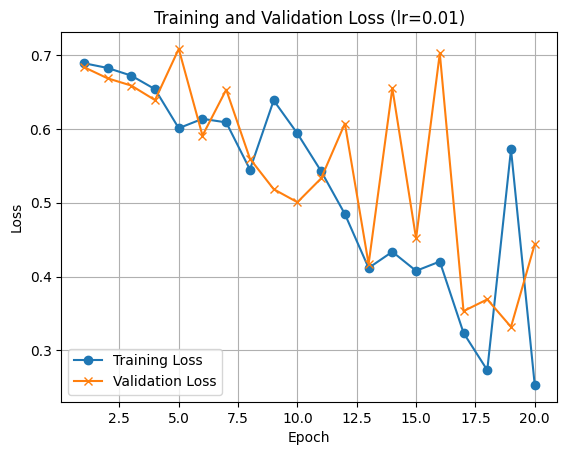

Test accuracy: 0.699999988079071
#========================================#

lr=0.001 | Epoch 1: train=0.6985, val=0.7035
lr=0.001 | Epoch 2: train=0.6972, val=0.7021
lr=0.001 | Epoch 3: train=0.6960, val=0.7012
lr=0.001 | Epoch 4: train=0.6942, val=0.7004
lr=0.001 | Epoch 5: train=0.6932, val=0.7000
lr=0.001 | Epoch 6: train=0.6931, val=0.6991
lr=0.001 | Epoch 7: train=0.6916, val=0.6985
lr=0.001 | Epoch 8: train=0.6907, val=0.6977
lr=0.001 | Epoch 9: train=0.6885, val=0.6982
lr=0.001 | Epoch 10: train=0.6906, val=0.6965
lr=0.001 | Epoch 11: train=0.6898, val=0.6959
lr=0.001 | Epoch 12: train=0.6875, val=0.6960
lr=0.001 | Epoch 13: train=0.6878, val=0.6944
lr=0.001 | Epoch 14: train=0.6870, val=0.6941
lr=0.001 | Epoch 15: train=0.6853, val=0.6943
lr=0.001 | Epoch 16: train=0.6854, val=0.6922
lr=0.001 | Epoch 17: train=0.6840, val=0.6914
lr=0.001 | Epoch 18: train=0.6841, val=0.6908
lr=0.001 | Epoch 19: train=0.6824, val=0.6909
lr=0.001 | Epoch 20: train=0.6811, val=0.6894


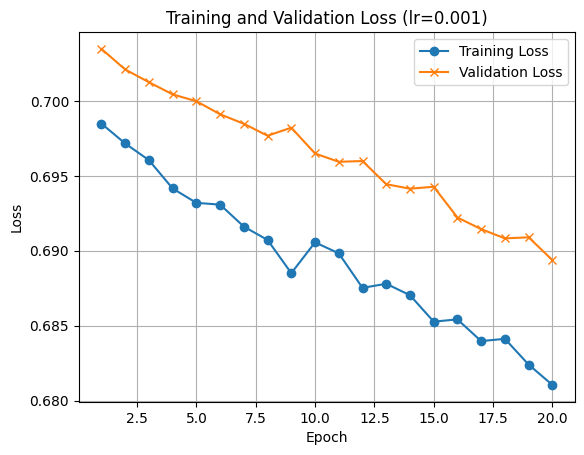

Test accuracy: 0.4333333373069763
#========================================#

lr=0.0001 | Epoch 1: train=0.6956, val=0.6979
lr=0.0001 | Epoch 2: train=0.6952, val=0.6976
lr=0.0001 | Epoch 3: train=0.6958, val=0.6974
lr=0.0001 | Epoch 4: train=0.6947, val=0.6971
lr=0.0001 | Epoch 5: train=0.6957, val=0.6967
lr=0.0001 | Epoch 6: train=0.6944, val=0.6965
lr=0.0001 | Epoch 7: train=0.6935, val=0.6963
lr=0.0001 | Epoch 8: train=0.6928, val=0.6961
lr=0.0001 | Epoch 9: train=0.6935, val=0.6958
lr=0.0001 | Epoch 10: train=0.6930, val=0.6956
lr=0.0001 | Epoch 11: train=0.6938, val=0.6953
lr=0.0001 | Epoch 12: train=0.6919, val=0.6950
lr=0.0001 | Epoch 13: train=0.6933, val=0.6947
lr=0.0001 | Epoch 14: train=0.6930, val=0.6944
lr=0.0001 | Epoch 15: train=0.6921, val=0.6941
lr=0.0001 | Epoch 16: train=0.6908, val=0.6939
lr=0.0001 | Epoch 17: train=0.6906, val=0.6937
lr=0.0001 | Epoch 18: train=0.6916, val=0.6933
lr=0.0001 | Epoch 19: train=0.6917, val=0.6929
lr=0.0001 | Epoch 20: train=0.6894, va

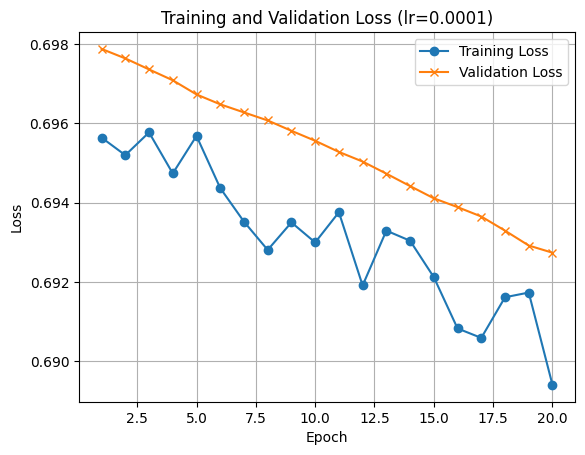

Test accuracy: 0.4333333373069763
#========================================#

lr=1e-05 | Epoch 1: train=0.6934, val=0.6880
lr=1e-05 | Epoch 2: train=0.6899, val=0.6880
lr=1e-05 | Epoch 3: train=0.6900, val=0.6880
lr=1e-05 | Epoch 4: train=0.6912, val=0.6880
lr=1e-05 | Epoch 5: train=0.6905, val=0.6879
lr=1e-05 | Epoch 6: train=0.6919, val=0.6879
lr=1e-05 | Epoch 7: train=0.6918, val=0.6879
lr=1e-05 | Epoch 8: train=0.6918, val=0.6879
lr=1e-05 | Epoch 9: train=0.6924, val=0.6879
lr=1e-05 | Epoch 10: train=0.6924, val=0.6879
lr=1e-05 | Epoch 11: train=0.6915, val=0.6878
lr=1e-05 | Epoch 12: train=0.6916, val=0.6878
lr=1e-05 | Epoch 13: train=0.6916, val=0.6878
lr=1e-05 | Epoch 14: train=0.6909, val=0.6878
lr=1e-05 | Epoch 15: train=0.6909, val=0.6878
lr=1e-05 | Epoch 16: train=0.6908, val=0.6877
lr=1e-05 | Epoch 17: train=0.6902, val=0.6877
lr=1e-05 | Epoch 18: train=0.6907, val=0.6877
lr=1e-05 | Epoch 19: train=0.6893, val=0.6877
lr=1e-05 | Epoch 20: train=0.6908, val=0.6877


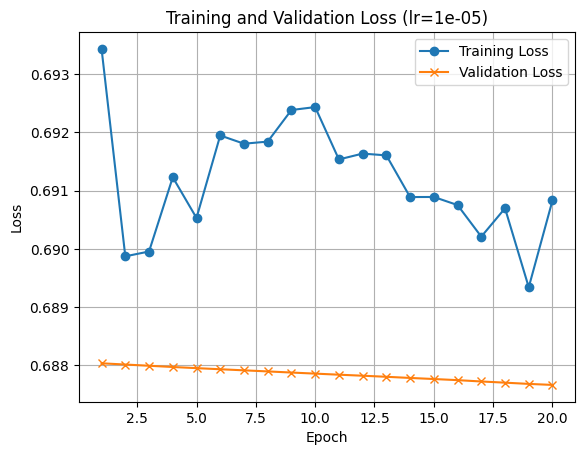

Test accuracy: 0.5666666626930237
#========================================#



In [127]:
def train_and_evaluate(lr):
    model = SimpleNN()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    epochs = 20

    for epoch in range(epochs):

        model.train()
        running_train_loss = 0

        for X, y in train_loader:
            y = y.float()
            y_hat = model(X).squeeze()
            loss = criterion(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        train_losses.append(running_train_loss / len(train_loader))

        model.eval()
        with torch.no_grad():
            for X, y in val_loader:
                y = y.float()
                y_hat = model(X).squeeze()
                val_loss = criterion(y_hat, y)

        val_losses.append(val_loss.item())

        print(f"lr={lr} | Epoch {epoch+1}: train={train_losses[-1]:.4f}, val={val_losses[-1]:.4f}")

    plt.plot(range(1, epochs+1), train_losses, marker='o', label='Training Loss')
    plt.plot(range(1, epochs+1), val_losses, marker='x', label='Validation Loss')
    plt.title(f'Training and Validation Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    with torch.no_grad():
        X, y = next(iter(test_loader))
        y_hat = model(X)[:, 0]
        y_hat = (y_hat > 0.5).float()
        accuracy = (y_hat == y).float().mean()

    print("Test accuracy:", accuracy.item())
    print("#========================================#\n")

for lr in [1e-2, 1e-3, 1e-4, 1e-5]:
    train_and_evaluate(lr)
